# Naive Bayes

Naive Bayes is a family of probabilistic algorithms based on Bayes' Theorem, used for classification tasks. The key idea is that the features used for classification are independent of each other, given the class label. This assumption is called "naive" because it's often unrealistic in real-world applications, but it simplifies the computation significantly.

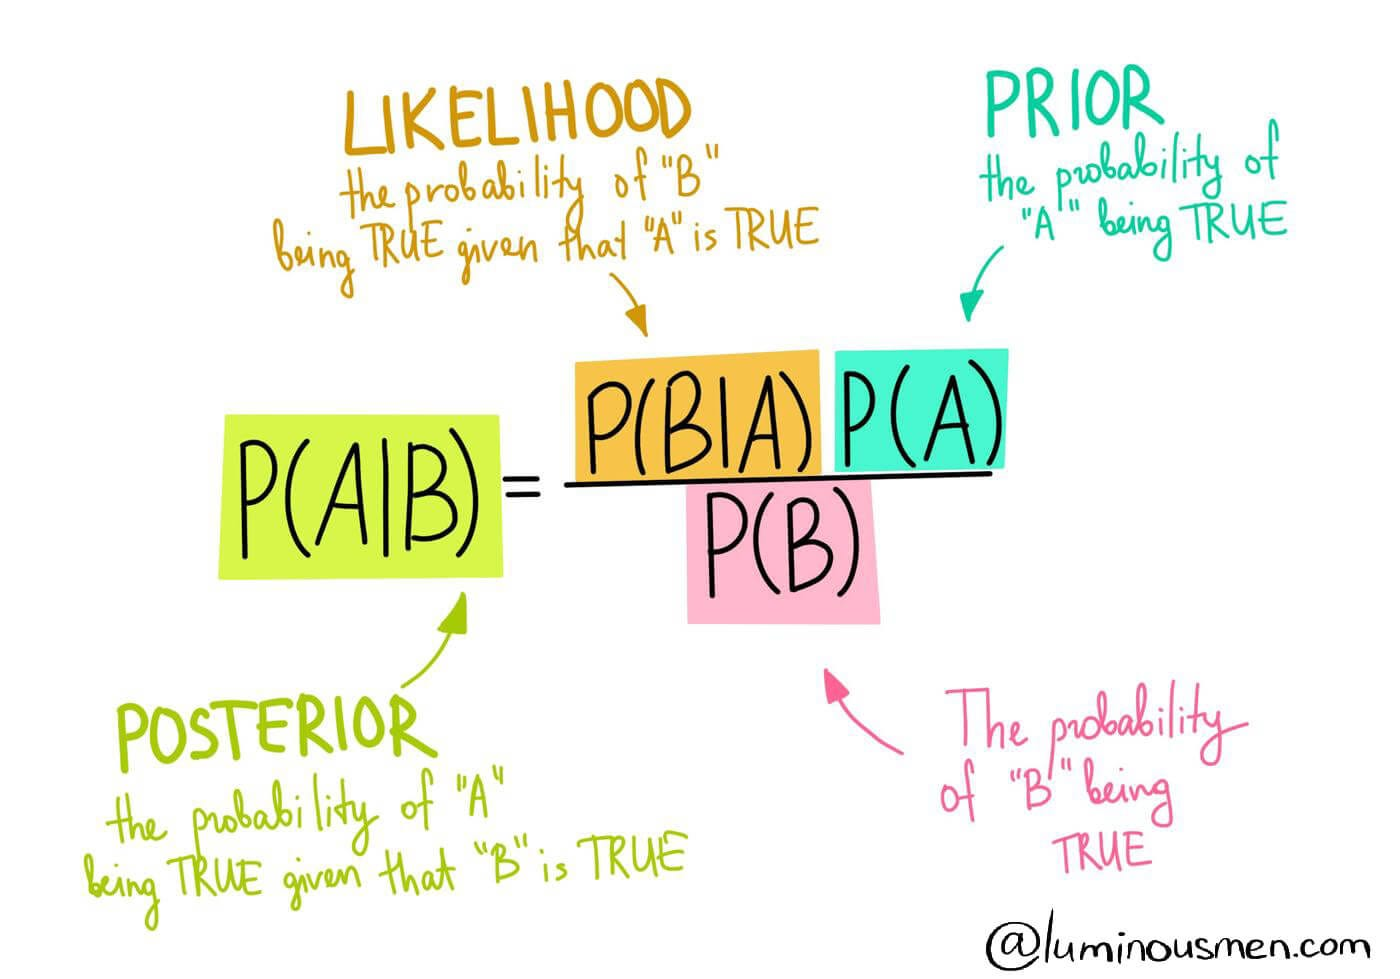

## Bayes' Theorem
Bayes' Theorem provides a way to update the probability estimate for a hypothesis as more evidence or information becomes available. The theorem is stated as:

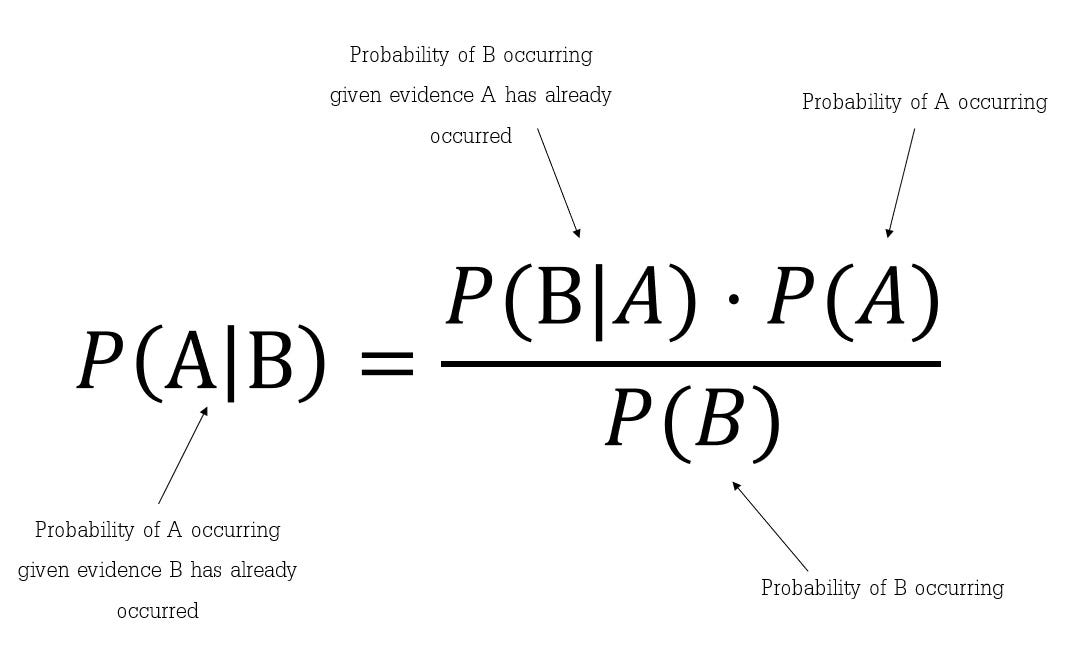

Where:
- \( P(A|B) \) is the posterior probability: the probability of the class \( A \) given the feature \( B \).
- \( P(B|A) \) is the likelihood: the probability of the feature \( B \) given the class \( A \).
- \( P(A) \) is the prior probability: the initial probability of the class \( A \).
- \( P(B) \) is the marginal likelihood: the probability of the feature \( B \) occurring under all possible classes.

## Types of Naive Bayes Classifiers
1. **Gaussian Naive Bayes**: Assumes that the features follow a normal distribution.
2. **Multinomial Naive Bayes**: Used when the features represent the frequency or count of events, such as word counts in text classification.
3. **Bernoulli Naive Bayes**: Suitable for binary/boolean features.

### Example: Text Classification

Let’s take a simple example where we classify emails as either "Spam" or "Not Spam" based on the occurrence of certain words.

#### Data:
- **Email 1**: "Free money now" → Spam
- **Email 2**: "Work meeting schedule" → Not Spam
- **Email 3**: "Claim your free prize" → Spam
- **Email 4**: "Schedule a meeting now" → Not Spam

#### Features:
- Words like "Free," "Money," "Now," "Meeting," "Schedule," "Prize," etc.

#### Steps:
1. **Calculate Priors:**

   $$P(\text{Spam}) = \frac{\text{Number of Spam emails}}{\text{Total number of emails}}$$

   $$P(\text{Not Spam}) = \frac{\text{Number of Not Spam emails}}{\text{Total number of emails}}$$

2. **Calculate Likelihoods:**

   For each word in the vocabulary, calculate the likelihood of the word given the class:

   $$P(\text{Free} \mid \text{Spam}) = \frac{\text{Number of Spam emails containing "Free"}}{\text{Total number of Spam emails}}$$

   $$P(\text{Free} \mid \text{Not Spam}) = \frac{\text{Number of Not Spam emails containing "Free"}}{\text{Total number of Not Spam emails}}$$

3. **Calculate Posterior for a New Email:**

   Given a new email "Free meeting now," calculate the posterior probabilities for Spam and Not Spam:

   $$P(\text{Spam} \mid \text{Free, Meeting, Now}) = P(\text{Free} \mid \text{Spam}) \cdot P(\text{Meeting} \mid \text{Spam}) \cdot P(\text{Now} \mid \text{Spam}) \cdot P(\text{Spam})$$

   Do the same for Not Spam and compare the two probabilities. The higher one indicates the class.

## Parameters in Naive Bayes

Naive Bayes algorithms don't have many parameters like some other machine learning models, but there are a few key considerations:

1. **Alpha (α)**:
   - **Multinomial/Bernoulli Naive Bayes**: This is a smoothing parameter (also known as Laplace smoothing) used to handle zero probabilities. It adds a small value (usually 1) to each count to avoid multiplying by zero.
   - Default: 1.0, but you can adjust it if you have a specific reason to prefer less smoothing.

2. **Fit Prior**:
   - A boolean parameter that determines whether the algorithm should learn the class prior probabilities from the training data or not.
   - Default: `True`.

3. **Class Priors**:
   - This allows you to manually set the prior probabilities of the classes. If `fit_prior` is set to `False`, you can provide your own prior probabilities.

4. **Binarize**:
   - For Bernoulli Naive Bayes, this parameter sets a threshold for converting the data into binary values. Any feature value above the threshold is set to 1, and below or equal to the threshold is set to 0.
   - Default: 0.0, meaning no binarization.

## Summary

Naive Bayes is a simple and effective algorithm for classification, especially in text classification and other scenarios where the independence assumption is reasonable. It's fast, requires a small amount of training data, and performs well with high-dimensional data.

# Importing Basic Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Describing the Data

Dataset Link - https://statso.io/loan-approval-prediction-case-study/

In [5]:
df = pd.read_csv('loan_prediction.csv')

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


1. **`Loan_ID`**: This column contains a unique identifier for each loan application. It is used to differentiate each record but isn't useful for the predictive modeling process.

2. **`Gender`**: This column indicates the gender of the applicant. Possible values might include 'Male' and 'Female'. Gender might be a factor in determining loan approval, depending on the context.

3. **`Married`**: This column indicates the marital status of the applicant. Possible values might include 'Yes' and 'No'. Marital status can influence the stability of an applicant’s financial status.

4. **`Dependents`**: This column indicates the number of dependents (children, elderly parents, etc.) the applicant has. It can impact the applicant's ability to repay the loan.

5. **`Education`**: This column indicates the education level of the applicant, such as 'Graduate' or 'Not Graduate'. Higher education levels might correlate with higher income and better creditworthiness.

6. **`Self_Employed`**: This column indicates whether the applicant is self-employed or not. Self-employment can influence income stability, which might impact loan approval.

7. **`ApplicantIncome`**: This column contains the income of the applicant. Higher income generally increases the chances of loan approval.

8. **`CoapplicantIncome`**: This column contains the income of the co-applicant (if any). Combined with the applicant's income, it gives an overall picture of the household's earning capability.

9. **`LoanAmount`**: This column indicates the loan amount requested by the applicant. It is a key factor in loan approval decisions, with higher amounts requiring greater scrutiny.

10. **`Loan_Amount_Term`**: This column represents the term of the loan in months. A longer term might reduce the monthly payment burden but could increase the total interest paid over time.

11. **`Credit_History`**: This column indicates the applicant's credit history, typically represented as a binary value (1 for good credit history, 0 for bad). It is a crucial factor in determining loan eligibility.

12. **`Property_Area`**: This column indicates the area where the property is located, such as 'Urban', 'Semiurban', or 'Rural'. The property location might affect loan approval due to market values and risks associated with different areas.

13. **`Loan_Status`**: This is the target variable that indicates whether the loan was approved ('Y') or not ('N'). The goal is to predict this column using the other features.
### Summary:
This dataset is designed to predict whether a loan application will be approved based on various factors related to the applicant’s personal, financial, and credit history. The target variable, `Loan_Status`, is binary, making this a classification problem where you will use the other features to predict loan approval.

In [9]:
df.drop(['Loan_ID'], axis =1,inplace =True)

In [13]:
df.shape

(614, 12)

In [17]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Data Exploration and Preprocessing

The Categorical Columns are: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


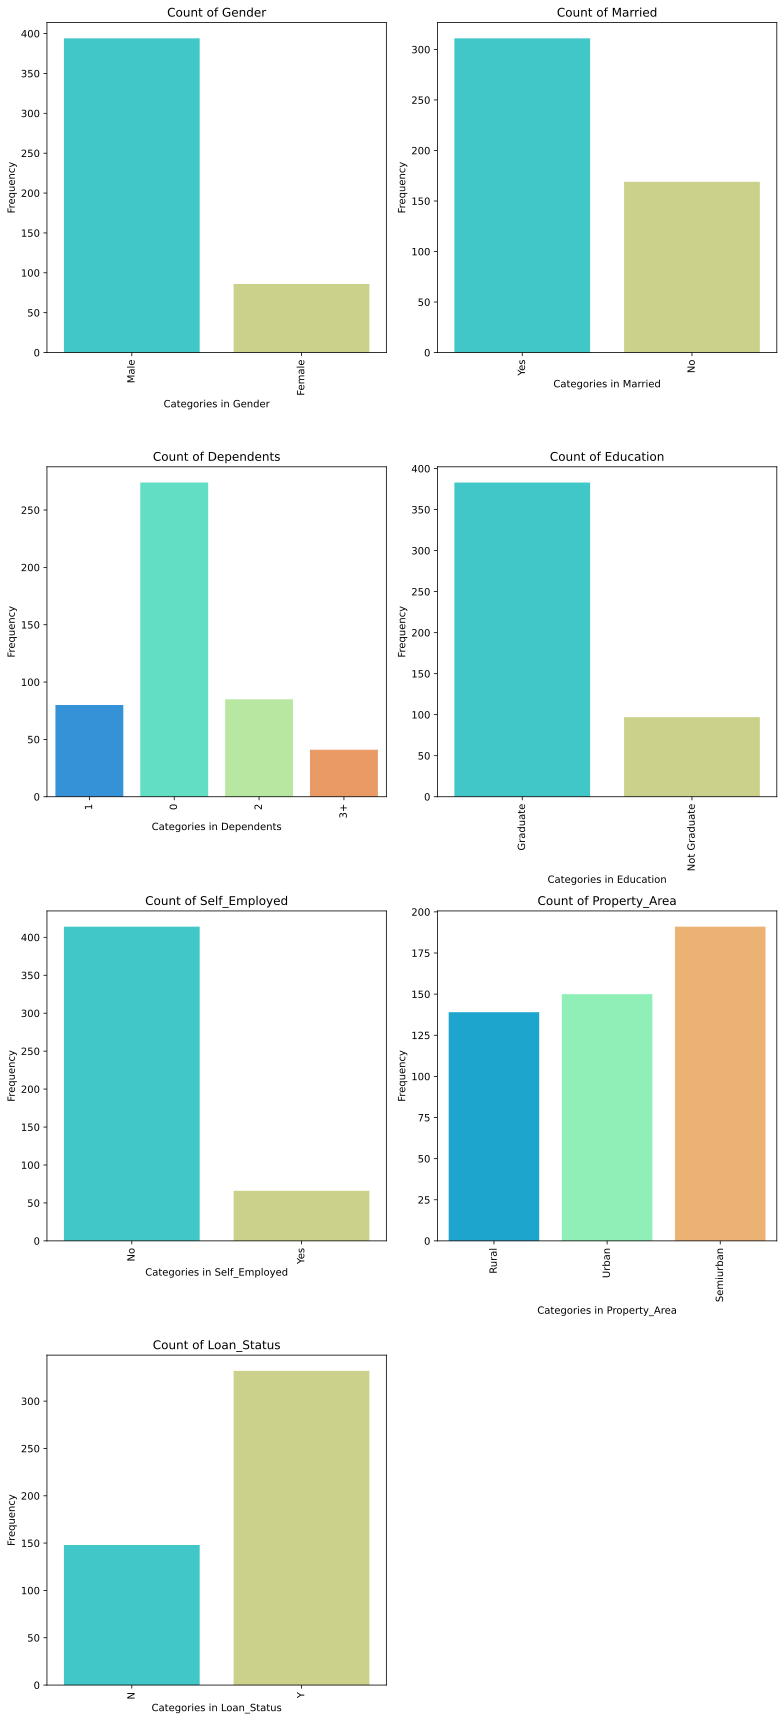

In [23]:
Categorical_Columns = []

for i in df.columns:
    if df[i].dtype == 'object':
        Categorical_Columns.append(i)
print(f'The Categorical Columns are: {Categorical_Columns}')

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Categorical_Columns):
    sns.countplot(data=df, x=col, palette='rainbow', ax=axes[i])
    axes[i].set_xlabel(f'Categories in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(Categorical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Numerical Columns in data are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


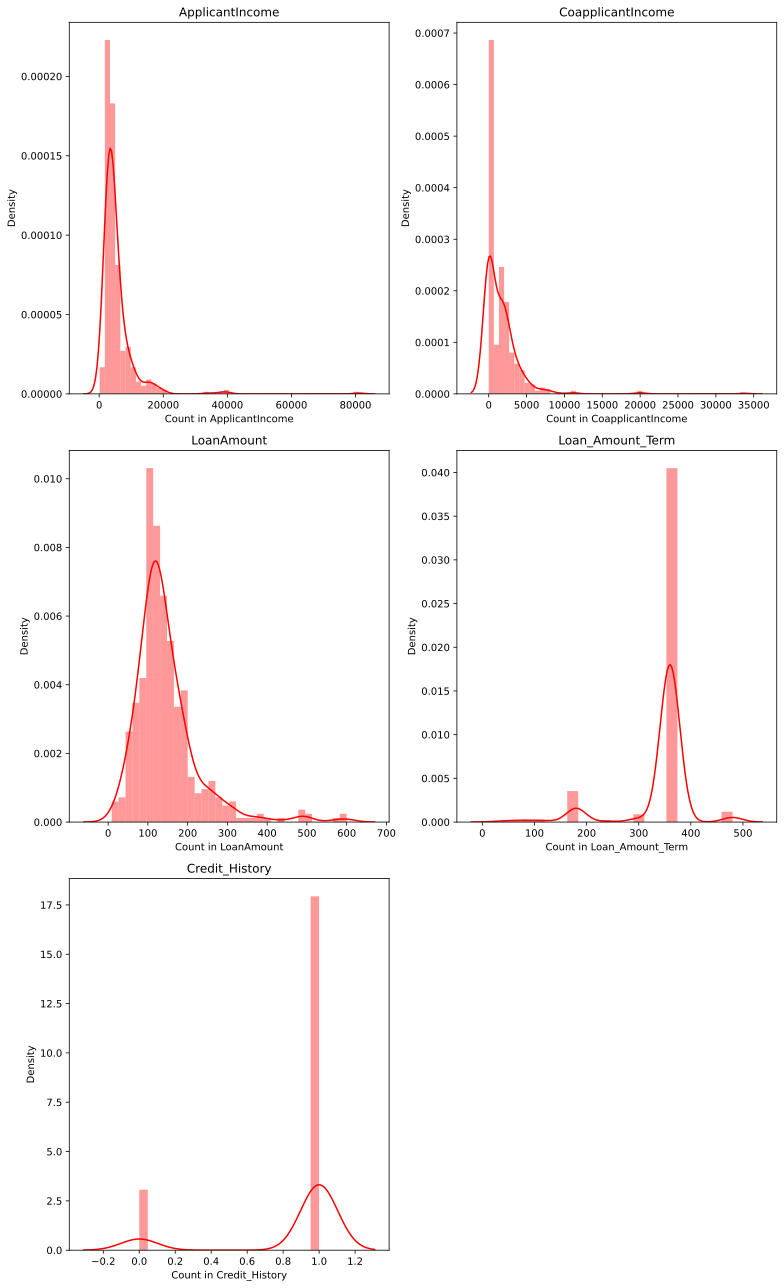

In [25]:
Numerical_Columns = [i for i in df.columns if df[i].dtype != 'object']
print("Numerical Columns in data are : ",Numerical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.distplot(df, x=df[col], color='Red', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

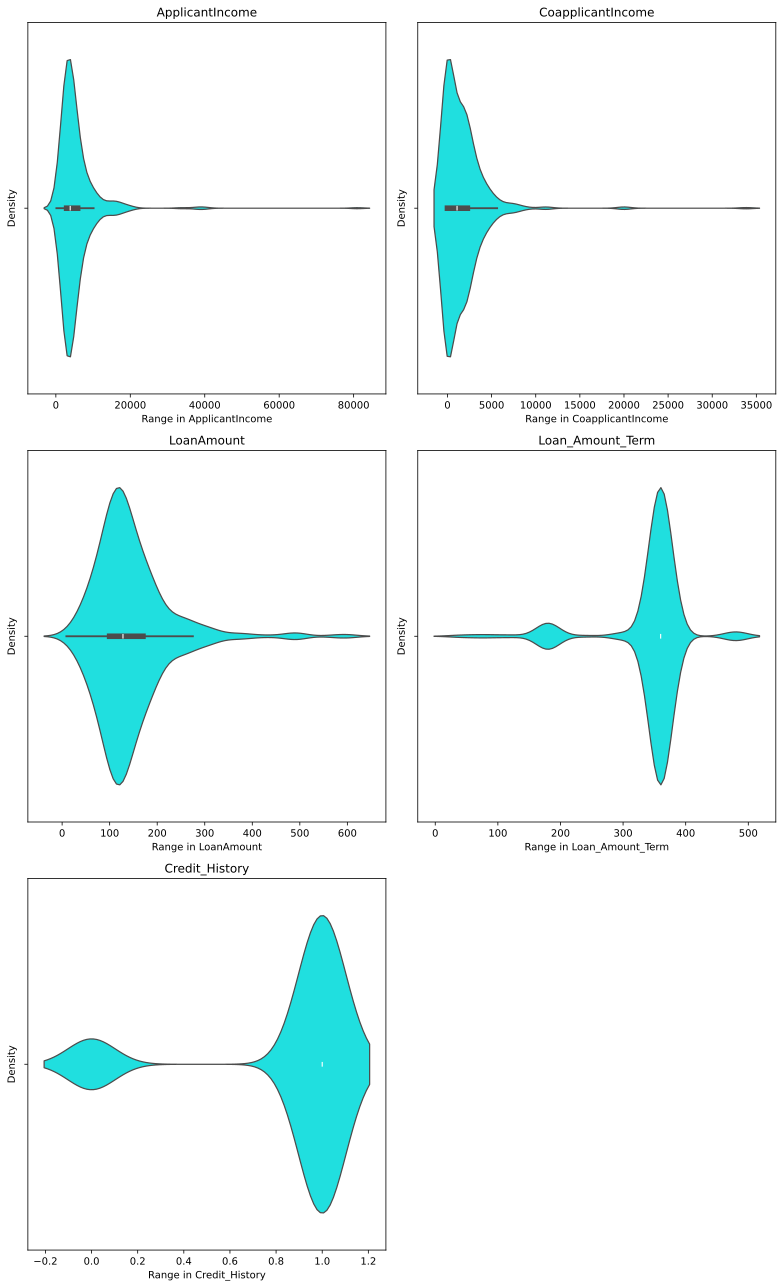

In [27]:
num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.violinplot(df, x=df[col], color='cyan', ax=axes[i])
    axes[i].set_xlabel(f'Range in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Deifining X and y varaible as independent and dependent variable.

In [29]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Feature Scaling

In [33]:
#This is because we don't want the target variable to be encoded as OneHot
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ], remainder='passthrough')

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Model building

In [39]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

## Model Pipiline Overview

In [45]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', GaussianNB())])

In [47]:
y_pred = model_pipeline.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 83.33%
Classification Report:
               precision    recall  f1-score   support

           N       0.81      0.59      0.68        44
           Y       0.84      0.94      0.89       100

    accuracy                           0.83       144
   macro avg       0.83      0.77      0.79       144
weighted avg       0.83      0.83      0.82       144



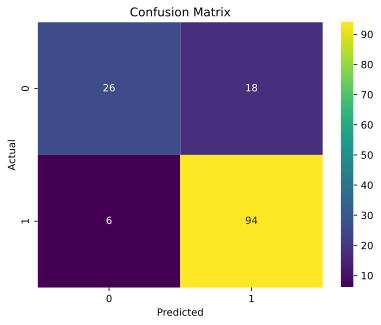

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Summary

| **Metric**          | **Value** | **Interpretation** |
|---------------------|-----------|--------------------|
| **Accuracy**        | 83.33%    | Overall, 83.33% of the loan predictions were correct. This means that out of 144 loan applications, the model correctly predicted the loan status for approximately 120 applications. |
| **Precision (N)**   | 0.81      | Of all the loans predicted as not approved (N), 81% were actually not approved. Precision measures the model’s accuracy when it predicts a loan as not approved. |
| **Recall (N)**      | 0.59      | Of all the actual not approved loans, the model correctly identified 59% of them. Recall measures the model’s ability to identify all actual not approved loans. |
| **F1-Score (N)**    | 0.68      | The F1-score is the harmonic mean of precision and recall for not approved loans, balancing the two metrics. A score of 0.68 indicates a moderate balance between precision and recall. |
| **Precision (Y)**   | 0.84      | Of all the loans predicted as approved (Y), 84% were actually approved. This indicates that the model is relatively good at identifying approved loans. |
| **Recall (Y)**      | 0.94      | Of all the actual approved loans, the model correctly identified 94% of them. This high recall suggests that the model is very good at detecting loans that should be approved. |
| **F1-Score (Y)**    | 0.89      | The F1-score for approved loans is 0.89, indicating a strong balance between precision and recall, with better performance on approved loans compared to not approved ones. |
| **Support (N)**     | 44        | There were 44 actual instances where the loan was not approved in the test dataset. |
| **Support (Y)**     | 100       | There were 100 actual instances where the loan was approved in the test dataset. |
| **Macro Avg**       | 0.83 (Precision) <br> 0.77 (Recall) <br> 0.79 (F1-Score) | The macro average is the average of the precision, recall, and F1-scores for both classes (N and Y), treating each class equally. This provides an overall view of model performance without considering class imbalance. |
| **Weighted Avg**    | 0.83 (Precision) <br> 0.83 (Recall) <br> 0.82 (F1-Score) | The weighted average takes into account the support (number of instances) for each class, providing a more balanced metric that reflects the performance across the entire dataset. |